# **DMResources Limited - personalized micro credits**

### **Paso 1: Carga de datos**


In [43]:
file_path = '/content/Data.xlsx'

### **Paso 2: Importar bibliotecas necesarias**


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* Cargaremos las tres tablas desde el archivo Excel.

In [45]:
sheet_names = pd.ExcelFile(file_path).sheet_names

sheet_names

['Charges', 'Other data', 'Churn']

* Una vez que conocemos los nombres de las hojas, podemos cargar cada una de ellas.

In [46]:
df1 = pd.read_excel(file_path, sheet_name=sheet_names[0])
df2 = pd.read_excel(file_path, sheet_name=sheet_names[1])
df3 = pd.read_excel(file_path, sheet_name=sheet_names[2])

*  Mostrar las primeras filas de cada DataFrame

In [47]:
df1.head()

,customerID,MonthlyCharges,TotalCharges
0,7590-VHVEG,29.85,29.85
1,5575-GNVDE,56.95,1889.5
2,3668-QPYBK,53.85,108.15
3,7795-CFOCW,42.30,1840.75
4,9237-HQITU,70.70,151.65


In [48]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [49]:
df3.head()

,customerID,Churn
0,7590-VHVEG,Yes
1,5575-GNVDE,Yes
2,3668-QPYBK,Yes
3,7795-CFOCW,Yes
4,9237-HQITU,Yes


### **Paso 3: Preprocesamiento de datos**

* Inspeccionamos y limpiamos los datos para asegurarnos de que estén en buen estado para el análisis.



In [50]:
# Eliminar duplicados.
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)
df3.drop_duplicates(inplace=True)

In [62]:
#  manejar valores nulos, NaN.
numeric_columns_df1 = df1.select_dtypes(include=[np.number]).columns
numeric_columns_df2 = df2.select_dtypes(include=[np.number]).columns
numeric_columns_df3 = df3.select_dtypes(include=[np.number]).columns

df1[numeric_columns_df1] = df1[numeric_columns_df1].fillna(df1[numeric_columns_df1].mean())
df2[numeric_columns_df2] = df2[numeric_columns_df2].fillna(df2[numeric_columns_df2].mean())
df3[numeric_columns_df3] = df3[numeric_columns_df3].fillna(df3[numeric_columns_df3].mean())

In [63]:
# Eliminar valores NaN.
df1.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)

# **Paso 3: Inspeccionar y limpiar los datos**


In [64]:
# Unir los DataFrames (ejemplo utilizando una columna 'customerID' común)
df = df1.merge(df2, on='customerID').merge(df3, on='customerID')

In [65]:
df.head()

,customerID,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,29.85,29.85,Female,0,Yes,No,1,No,No phone service,...,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
1,5575-GNVDE,56.95,1889.5,Male,0,No,No,34,Yes,No,...,Yes,No,Yes,No,No,No,One year,No,Mailed check,Yes
2,3668-QPYBK,53.85,108.15,Male,0,No,No,2,Yes,No,...,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,42.30,1840.75,Male,0,No,No,45,No,No phone service,...,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),Yes
4,9237-HQITU,70.70,151.65,Female,0,No,No,2,Yes,No,...,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [66]:
df.isnull().sum()

customerID          0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

### **Paso 5: Análisis exploratorio de datos (EDA)**

Realizamos un análisis exploratorio de datos para entender mejor el comportamiento de los datos.

In [69]:
# Estadísticas descriptivas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7023 entries, 0 to 7022
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7023 non-null   object 
 1   MonthlyCharges    7023 non-null   float64
 2   TotalCharges      7023 non-null   object 
 3   gender            7023 non-null   object 
 4   SeniorCitizen     7023 non-null   int64  
 5   Partner           7023 non-null   object 
 6   Dependents        7023 non-null   object 
 7   tenure            7023 non-null   int64  
 8   PhoneService      7023 non-null   object 
 9   MultipleLines     7023 non-null   object 
 10  InternetService   7023 non-null   object 
 11  OnlineSecurity    7023 non-null   object 
 12  OnlineBackup      7023 non-null   object 
 13  DeviceProtection  7023 non-null   object 
 14  TechSupport       7023 non-null   object 
 15  StreamingTV       7023 non-null   object 
 16  StreamingMovies   7023 non-null   object 


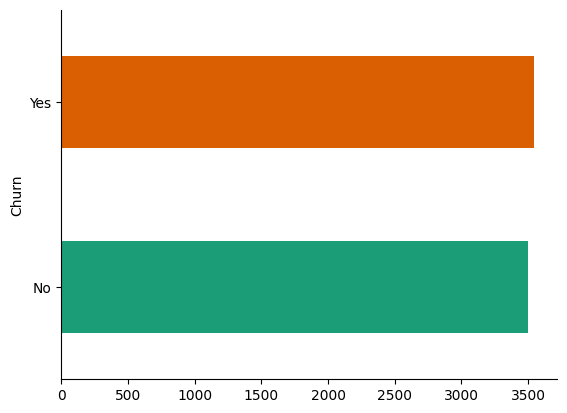

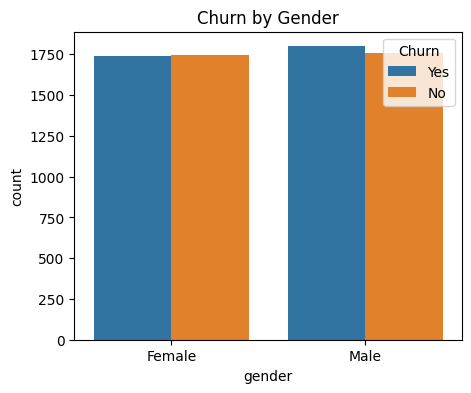

In [55]:
# @title Churn

from matplotlib import pyplot as plt
import seaborn as sns
df3.groupby('Churn').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.figure(figsize=(5, 4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()

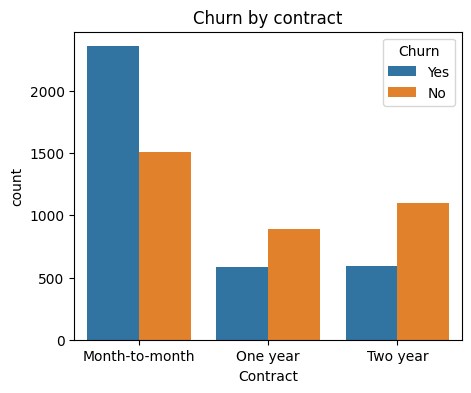

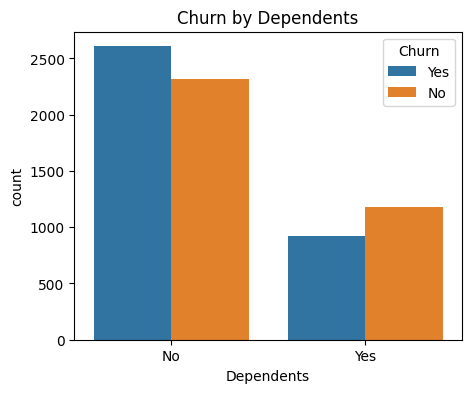

In [70]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by contract')
plt.show()
plt.figure(figsize=(5, 4))
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title('Churn by Dependents')
plt.show()

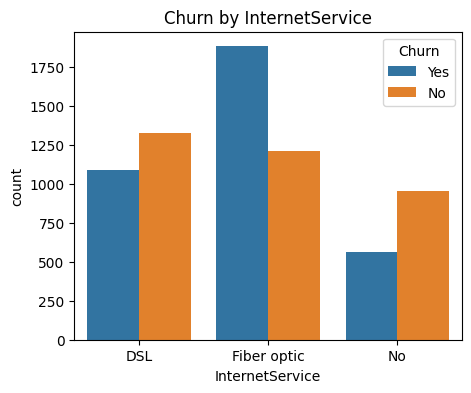

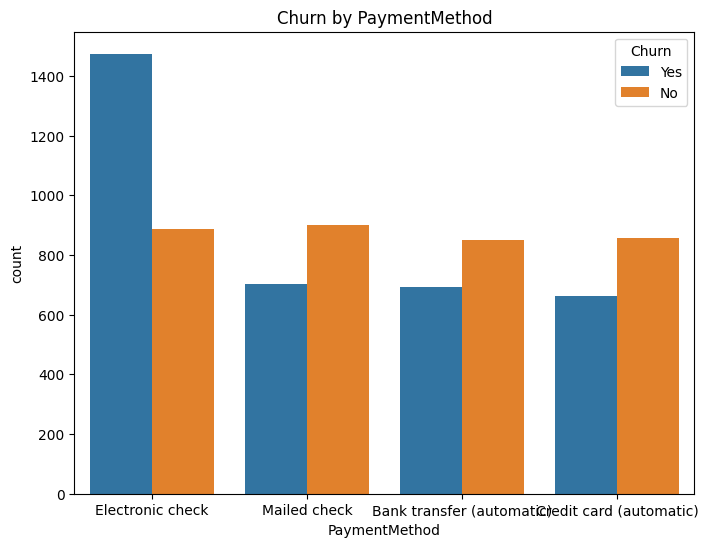

In [71]:
plt.figure(figsize=(5, 4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by InternetService')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by PaymentMethod')
plt.show()

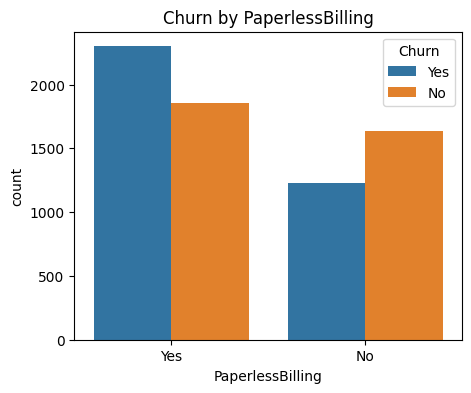

In [72]:
plt.figure(figsize=(5, 4))
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.title('Churn by PaperlessBilling')
plt.show()

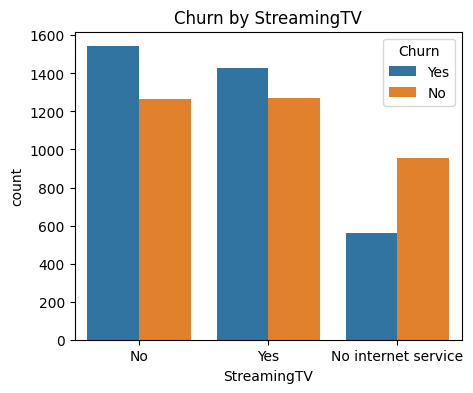

In [73]:
plt.figure(figsize=(5, 4))
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.title('Churn by StreamingTV')
plt.show()

In [74]:
from sklearn.preprocessing import LabelEncoder
# Identificar columnas no numéricas
non_numeric_columns = df.select_dtypes(include=[object]).columns

# Imprimir columnas no numéricas y sus valores únicos para inspección
for col in non_numeric_columns:
    print(f"Columna: {col}")
    print(df[col].unique())
    print("\n")

# Convertir columnas categóricas usando LabelEncoder o pd.get_dummies
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    df[col] = df[col].fillna('')  # Rellenar valores nulos con strings vacíos
    df[col] = label_encoder.fit_transform(df[col].astype(str))

Columna: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '7750-EYXWZ' '8361-LTMKD'
 '3186-AJIEK']


Columna: TotalCharges
[29.85 1889.5 108.15 ... 743.3 306.6 6844.5]


Columna: gender
['Female' 'Male']


Columna: Partner
['Yes' 'No']


Columna: Dependents
['No' 'Yes']


Columna: PhoneService
['No' 'Yes']


Columna: MultipleLines
['No phone service' 'No' 'Yes']


Columna: InternetService
['DSL' 'Fiber optic' 'No']


Columna: OnlineSecurity
['No' 'Yes' 'No internet service']


Columna: OnlineBackup
['Yes' 'No' 'No internet service']


Columna: DeviceProtection
['No' 'Yes' 'No internet service']


Columna: TechSupport
['No' 'Yes' 'No internet service']


Columna: StreamingTV
['No' 'Yes' 'No internet service']


Columna: StreamingMovies
['No' 'Yes' 'No internet service']


Columna: Contract
['Month-to-month' 'One year' 'Two year']


Columna: PaperlessBilling
['Yes' 'No']


Columna: PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic

**Tratamiento de Patologías en los Datos**

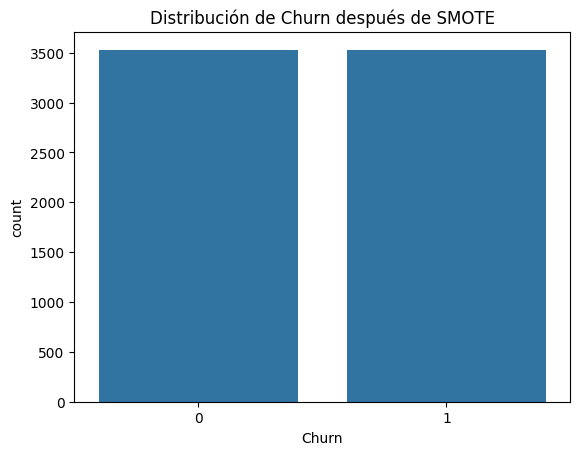

In [75]:
from imblearn.over_sampling import SMOTE

# Separar características numéricas y la columna objetivo
X = df.drop(['Churn','customerID'], axis=1)
y = df['Churn']

# Manejo del desbalanceo de clases usando SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

sns.countplot(x=y_res)
plt.title('Distribución de Churn después de SMOTE')
plt.show()


### **Paso 6: Ejecución del modelo**


Probar diferentes modelos para ver la precision o prediccion de los datos.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.35, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6106839336301093
Confusion Matrix:
 [[819 422]
 [540 690]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.66      0.63      1241
           1       0.62      0.56      0.59      1230

    accuracy                           0.61      2471
   macro avg       0.61      0.61      0.61      2471
weighted avg       0.61      0.61      0.61      2471



In [ ]:
from xgboost import XGBClassifier
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6265344664778093
Confusion Matrix:
 [[667 400]
 [391 660]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63      1067
           1       0.62      0.63      0.63      1051

    accuracy                           0.63      2118
   macro avg       0.63      0.63      0.63      2118
weighted avg       0.63      0.63      0.63      2118



In [ ]:
from sklearn.linear_model import LogisticRegression

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6265344664778093
Confusion Matrix:
 [[667 400]
 [391 660]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63      1067
           1       0.62      0.63      0.63      1051

    accuracy                           0.63      2118
   macro avg       0.63      0.63      0.63      2118
weighted avg       0.63      0.63      0.63      2118

